In [47]:
#reading the data file
data <- read.csv('/Users/raviswanath/Downloads/R-Course-HTML-Notes/R-for-Data-Science-and-Machine-Learning/Training Exercises/Machine Learning Projects/CSV files for ML Projects/adult_sal.csv')

In [48]:
head(data, 5)

X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
library(dplyr)
data<- select(data, -X)

In [50]:
head(data)

age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [51]:
str(data)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40

The structure of the data set shows that there are multiple varibales that are categorical (Factors) and a few integers. 

In [52]:
summary(data)

      age                 type_employer       fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                    marital     
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

In [53]:
print(table(data$type_employer))


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 


1836 missing values in type_employer and way too many categories. Let's merge them and make this factor class much elegant.

In [54]:
# A simple function to merge multiple redundant categories in the type_employer column. 
cats <- function(job){
     job <- as.character(job)
      if (job=='Never-worked' | job=='Without-pay'){
             return('Unemployed')
      }else if(job == 'Local-gov' | job == 'State-gov'){
               return('SL-gov')
      }else if (job == 'Self-emp-inc' | job == 'Self-emp-not-inc'){
              return('self-emp')
      }else{
        return(job)
      }
     
}

#using sapply to apply the cats function to the column. 
data$type_employer <- sapply(data$type_employer, cats)

In [55]:
table(data$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

Let's group marital status as well as countries into better groupings. 

In [56]:
marriage <- function(status){
  status <- as.character(status)
  if(status == 'Married-AF-spouse' | status == 'Married-civ-spouse' | status == 'Married-spouse-absent'){
        return('Married')
  }else if( status == 'Divorced' | status == 'Widowed' | status == 'Separated'){
        return('Not-Married')
  }else{
        return('Never-Married')
  }
}

data$marital <- sapply(data$marital, marriage)

In [57]:
table(data$marital)


      Married Never-Married   Not-Married 
        15417         10683          6461 

In [58]:
continents <- function(country){
  country <- as.character(country)
  if ( country == 'Cambodia'| country == 'China'| country == 'Hong'| country == 'India'| country == 'Philippines'| country == 'Taiwan'| country == 'Thailand'| country == 'Vietnam' | country == 'Laos'| country == 'Japan'){
      return('Asia')
  }else if( country == 'Canada'|country == 'Puerto-Rico'| country == 'United-States'){
      return('North America')
  }else if(country == 'England'|country == 'France'|country == 'Germany'|country == 'Greece'|country == 'Holand-Netherlands'|country == 'Hungary'| country == 'Ireland'| country == 'Poland'| country == 'Italy'| country == 'Portugal'| country == 'Scotland'| country == 'Yugoslavia'){
      return('Europe')
  }else if(country == 'Columbia'|country == 'Cuba'|country == 'Dominican-Republic'|country == 'Nicaragua Outlying-US(Guam-USVI-etc)'|country == 'Ecuador'|country == 'El-Salvador'|country == 'Trinadad&Tobago'){
      return('Latin and South America')
  }else{
    return('Other')
  } 
}

data$country <- sapply(data$country, continents)

In [59]:
table(data$country)


                   Asia                  Europe Latin and South America 
                    628                     521                     377 
          North America                   Other 
                  29405                    1630 

In [60]:
#re-converting all the grouped/cleaned variables to factor. 
data$marital <- as.factor(data$marital)
data$country <- as.factor(data$country)
data$type_employer <- as.factor(data$type_employer)

In [61]:
#renaming the country column
names(data)[names(data) == 'country'] <- 'Region'

In [62]:
table(data$occupation)


                ?      Adm-clerical      Armed-Forces      Craft-repair 
             1843              3770                 9              4099 
  Exec-managerial   Farming-fishing Handlers-cleaners Machine-op-inspct 
             4066               994              1370              2002 
    Other-service   Priv-house-serv    Prof-specialty   Protective-serv 
             3295               149              4140               649 
            Sales      Tech-support  Transport-moving 
             3650               928              1597 

In [63]:
#convert ? into NAs
data[data == '?'] <- NA

In [64]:
table(data$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
          0         960       22696        3657        3391          21 

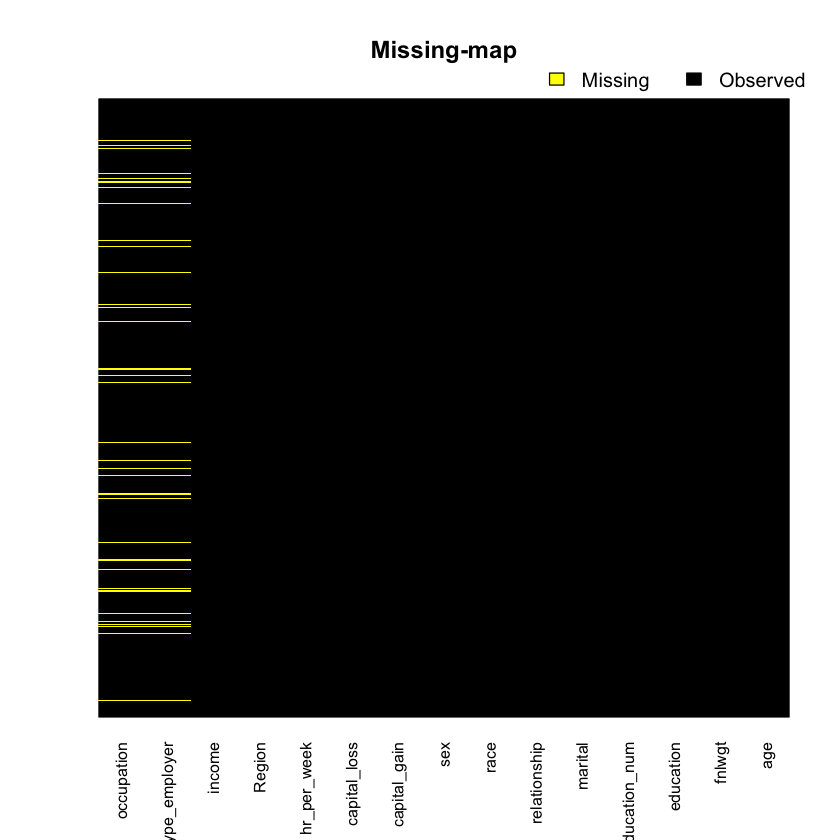

In [65]:
#Visualizing the proportion of missing data using Amelia 
library(Amelia)
missmap(data, main = 'Missing-map',y.at=c(1),y.labels = c(''), col = c('yellow', 'black'))

The missing map (yellow portion) shows the proportion of missing data. (1836 '?'  entires, to be exact.). 

In [66]:
#omitting all the missing data!
data <- na.omit(data)

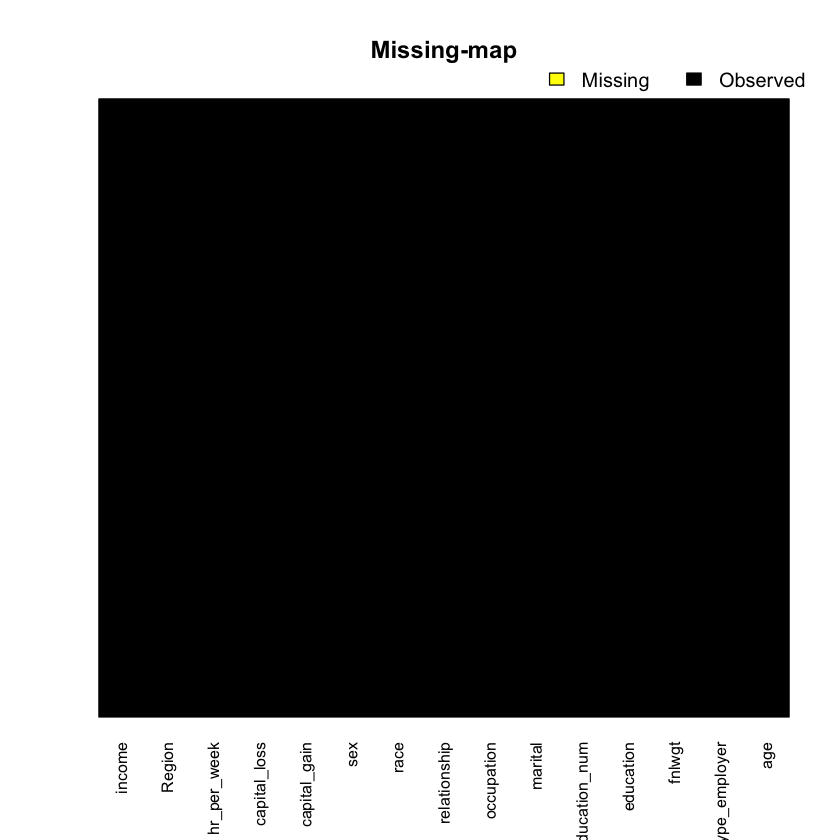

In [67]:
#checking to see if all the NA's have been removed from the data set. 
missmap(data, main = 'Missing-map',y.at=c(1),y.labels = c(''), col = c('yellow', 'black'))

## Exploratory Data Analysis

In [68]:
library(ggplot2)

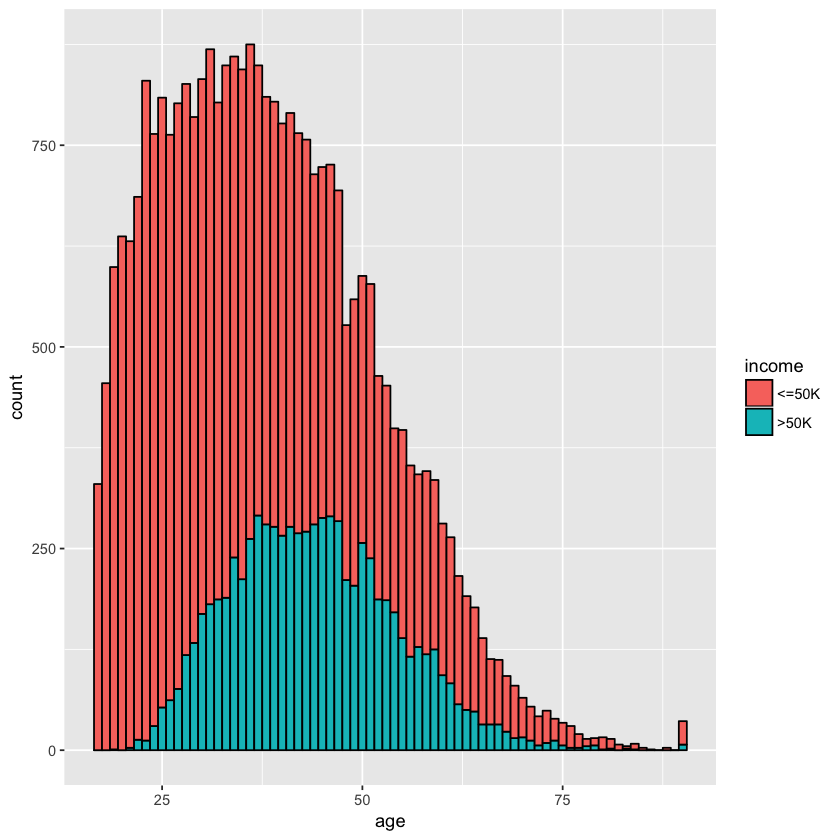

In [69]:
# Visualizing income with respect to salary.
ggplot(data,aes(age)) + geom_histogram(aes(fill=income),color='black',binwidth=1) 

The above plot shows that majority of th epopulation fall in the < 50k group. Most of the > 50k group is in the age range of 30-45.

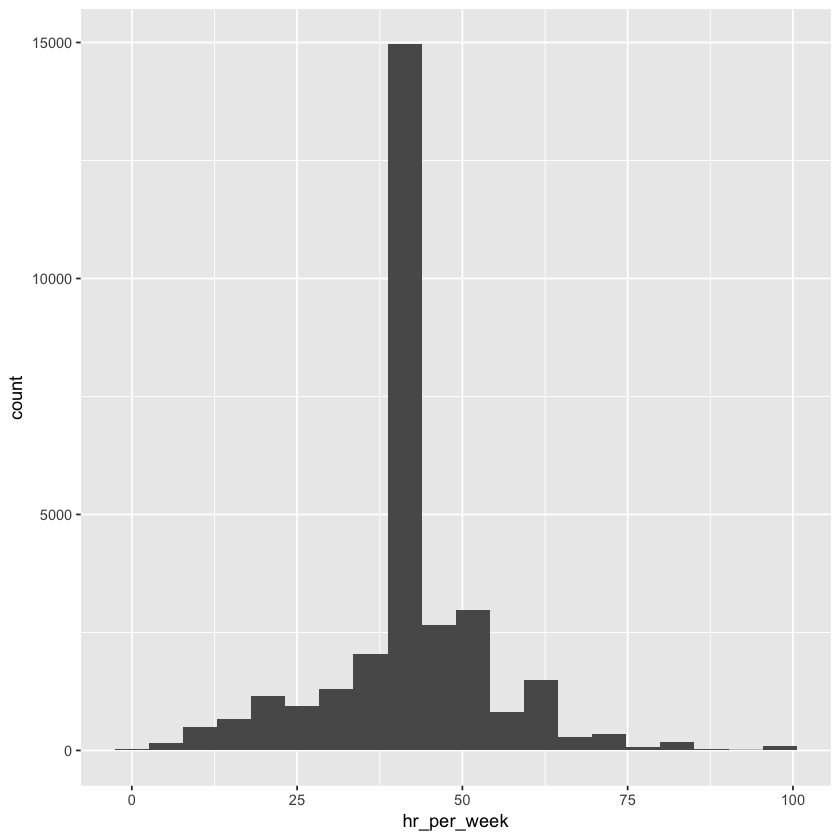

In [70]:
#histogram of hrs worked per week.
ggplot(data, aes(hr_per_week)) + geom_histogram(bins = 20) 

Majority of the population in our data-set works about 40 hours a week. 

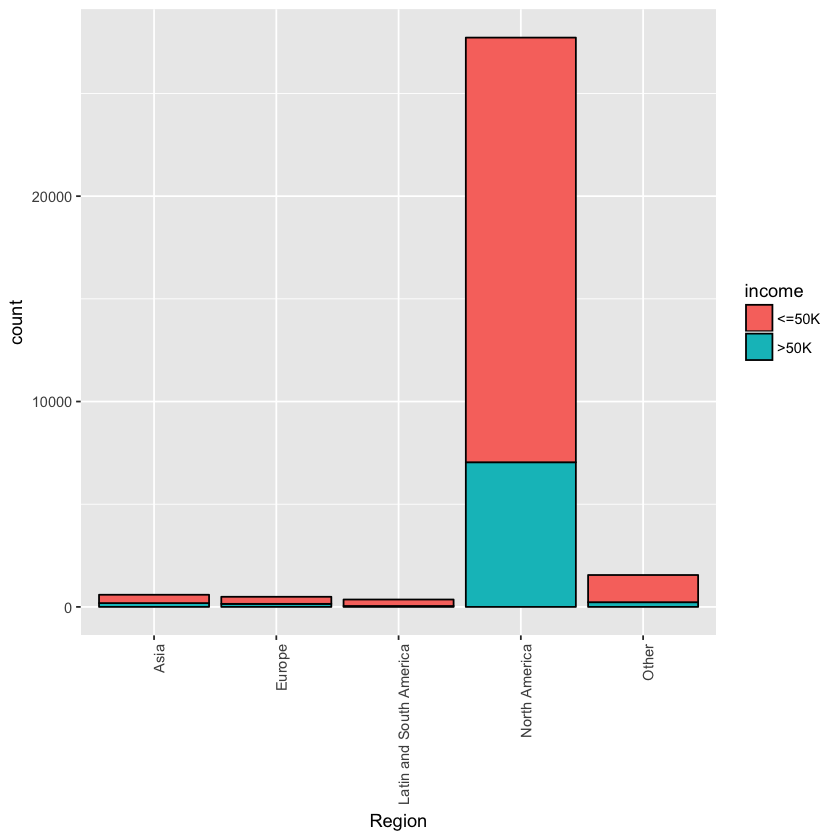

In [71]:
# Region wise distribution of income class
ggplot(data, aes(Region)) + geom_bar(aes(fill = income), color = 'black') + theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Model building and analysis

In [72]:
library(caTools)
set.seed(101)

In [73]:
#splitting the data into test and train sets
split <- sample.split(data$income, SplitRatio = 0.65)

In [74]:
test <- subset(data, split == FALSE)
train <- subset(data, split == TRUE)

In [75]:
#training the model
model <- glm(income ~ . , family = binomial(link = logit), data = train)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [76]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(link = logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1010  -0.5153  -0.1950   0.0000   3.5632  

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -5.493e+00  4.607e-01 -11.924  < 2e-16 ***
age                            2.539e-02  2.086e-03  12.168  < 2e-16 ***
type_employerPrivate          -4.416e-01  1.168e-01  -3.782 0.000156 ***
type_employerself-emp         -6.452e-01  1.292e-01  -4.993 5.93e-07 ***
type_employerSL-gov           -6.862e-01  1.313e-01  -5.225 1.74e-07 ***
type_employerUnemployed       -1.394e+01  3.847e+02  -0.036 0.971083    
fnlwgt                         4.758e-07  2.165e-07   2.198 0.027950 *  
education11th                  1.893e-01  2.627e-01   0.721 0.471042    
education12th                  4.040e-01  3.526e-01   1.146 0.251846    
education1st-4th    

We have a lot of features! Some important, some not so much. Let's use the step() function, which iteratively tries to remove predictor variables from the model in an attempt to delete variables that do not significantly add to the fit.

In [77]:
new.model <- step(model)

Start:  AIC=13075.58
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + Region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess


Step:  AIC=13075.58
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + Region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                Df Deviance   AIC
<none>                12968 13076
- fnlwgt         1    12972 13078
- race           4    12978 13078
- Region         4    12989 13089
- type_employer  4    13007 13107
- marital        2    13021 13125
- sex            1    13062 13168
- age            1    13117 13223
- capital_loss   1    13151 13257
- hr_per_week    1    13179 13285
- relationship   5    13253 13351
- occupation    13    13381 13463
- education     15    13641 13719
- capital_gain   1    14127 14233


In [78]:
summary(new.model)


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + Region, family = binomial(link = logit), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1010  -0.5153  -0.1950   0.0000   3.5632  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -5.493e+00  4.607e-01 -11.924  < 2e-16 ***
age                            2.539e-02  2.086e-03  12.168  < 2e-16 ***
type_employerPrivate          -4.416e-01  1.168e-01  -3.782 0.000156 ***
type_employerself-emp         -6.452e-01  1.292e-01  -4.993 5.93e-07 ***
type_employerSL-gov           -6.862e-01  1.313e-01  -5.225 1.74e-07 ***
type_employerUnemployed       -1.394e+01  3.847e+02  -0.036 0.971083    
fnlwgt                         4.758e-07  2.165e-07   2.198 0.027950 *  
education11th                  1.893e-01  2.627e-

Still the same number of predictors! Let's see how the model performs and then decide upon if further prunning is required. 

In [79]:
fitted.probs <- predict(new.model, test, type = 'response')

In [80]:
fitted.results <- ifelse(fitted.probs > 0.5, 1, 0) #using 0.5 as the cut-off

In [81]:
#The classification matrix
table(test$income, fitted.probs > 0.5)

       
        FALSE TRUE
  <=50K  7446  628
  >50K   1034 1644

In [82]:
#error metrics
acc <- (7446 + 1644)/(7466 + 628 + 1034 + 1644)
precision <- (7446)/(7446+1034)
recall <- (7446)/(7446 + 628)

In [84]:
acc*100 #accuracy

[1] 84.38544

In [85]:
precision*100 #precision

[1] 87.8066

In [86]:
recall*100 #recall

[1] 92.22195

Overall, the model seems to be working quite well even with those many number of predictors. Although, improvements in the performance (if the missclassification costs are skewed) could be achieved by looking for and implementing other prunning methods.